In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('COVID clinical trials.csv')

In [3]:
df.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [4]:
# Shape of the dataset
print("Shape:", df.shape)

Shape: (5783, 27)


In [5]:
# Column names and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [6]:
# Drop duplicates if any
df = df.drop_duplicates()

In [7]:
# Convert date columns
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['Completion Date'] = pd.to_datetime(df['Completion Date'], errors='coerce')

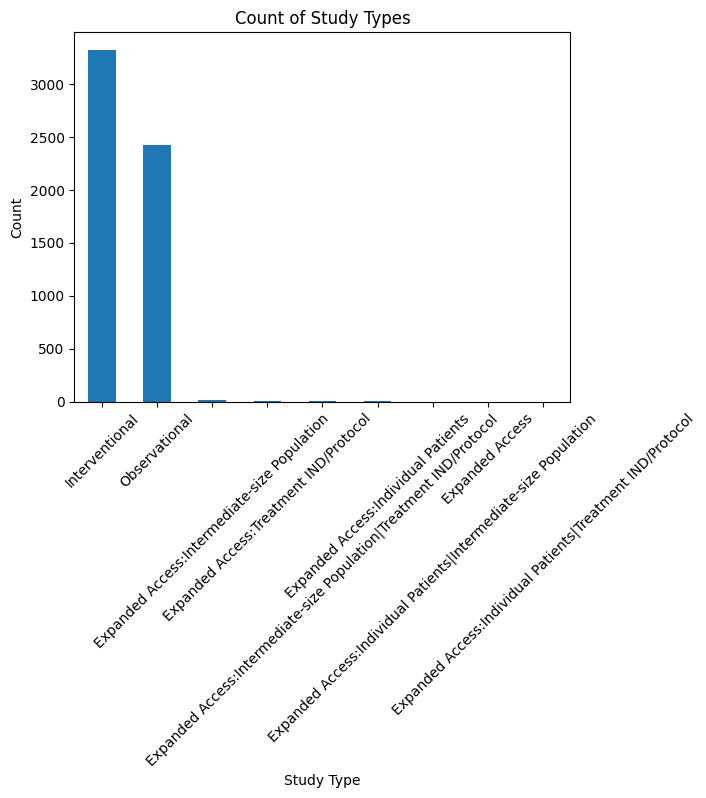

In [8]:
df['Study Type'].value_counts().plot(kind='bar', title='Count of Study Types')
plt.xlabel('Study Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

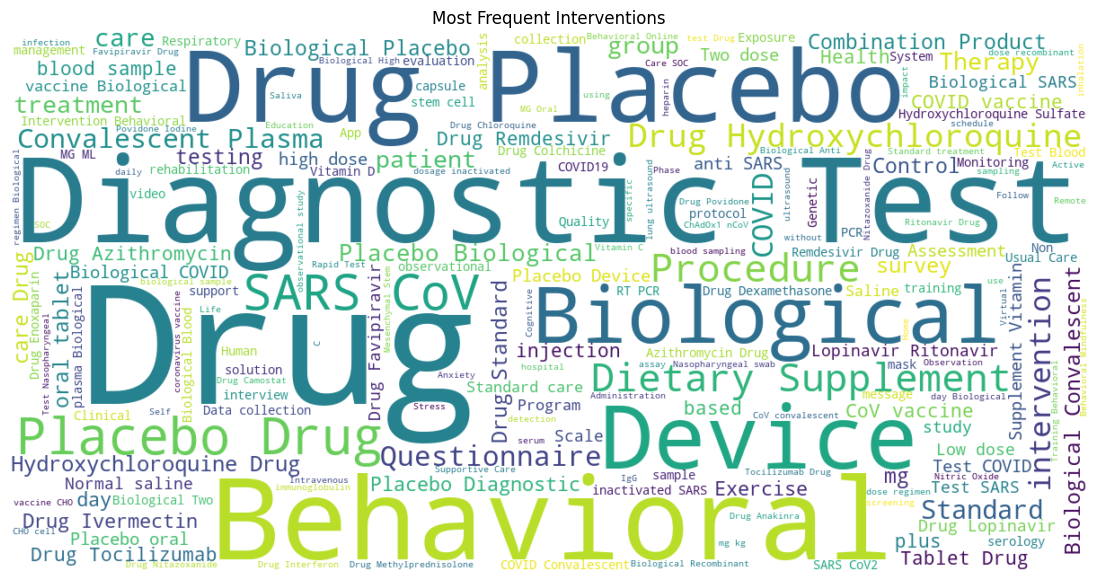

In [9]:
text = ' '.join(df['Interventions'].dropna().astype(str))
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(text)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Interventions")
plt.show()

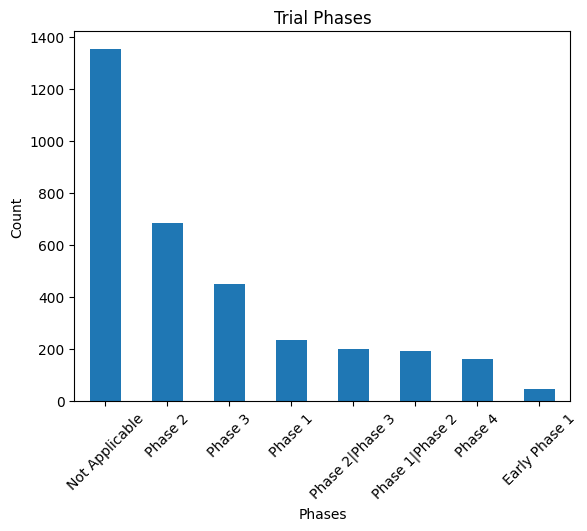

In [10]:
#Trial Phases
df['Phases'].value_counts().plot(kind='bar', title='Trial Phases')
plt.xlabel('Phases')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

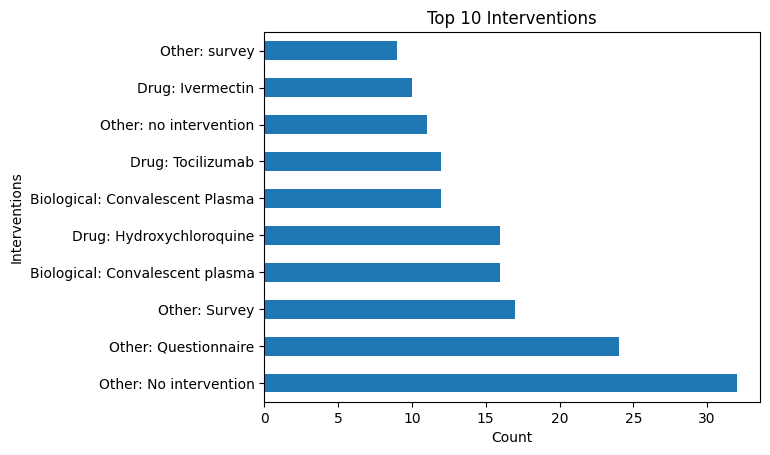

In [11]:
#Top Interventions
df['Interventions'].value_counts().head(10).plot(kind='barh', title='Top 10 Interventions')
plt.xlabel('Count')
plt.ylabel('Interventions')
plt.show()

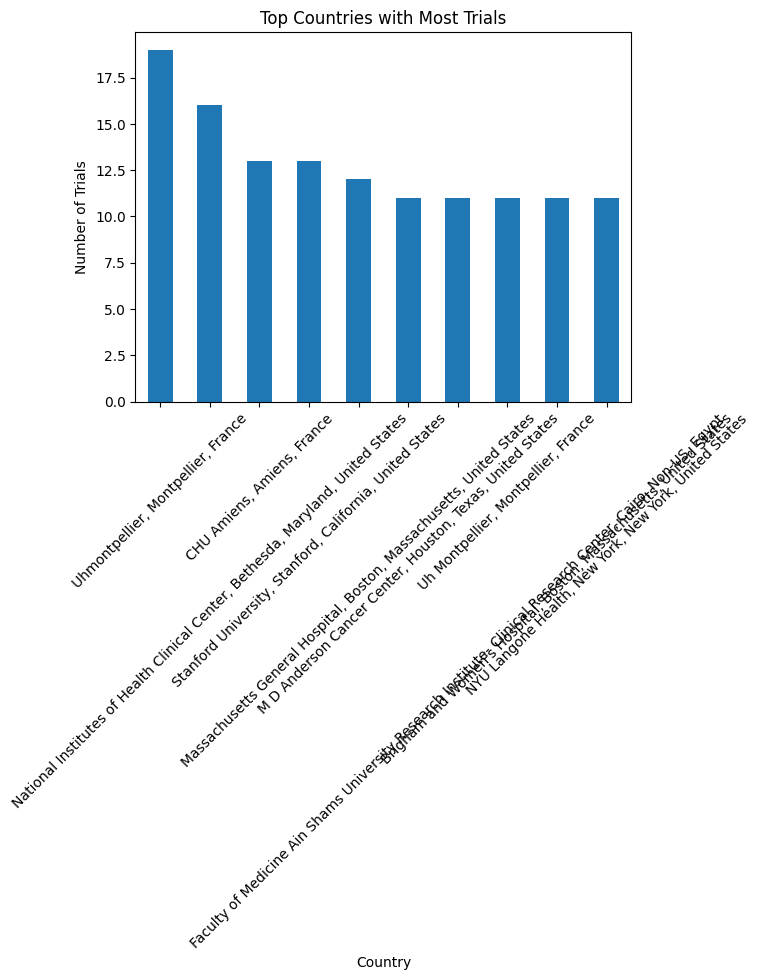

In [12]:
#Trials by Country
df['Locations'].value_counts().head(10).plot(kind='bar', title='Top Countries with Most Trials')
plt.xlabel('Country')
plt.ylabel('Number of Trials')
plt.xticks(rotation=45)
plt.show()

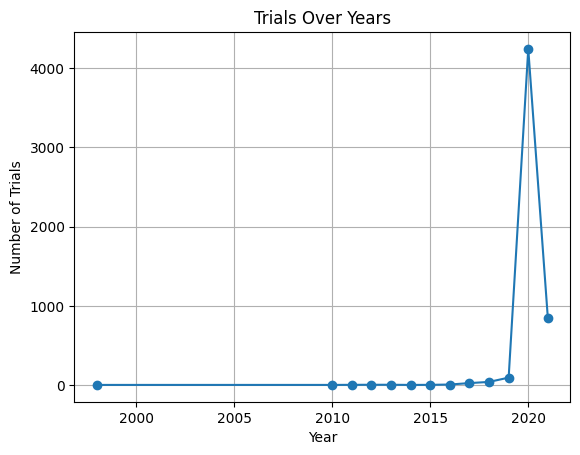

In [13]:
#Number of Trials Over Time
df['Start Year'] = df['Start Date'].dt.year
df['Start Year'].value_counts().sort_index().plot(kind='line', marker='o', title='Trials Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Trials')
plt.grid(True)
plt.show()

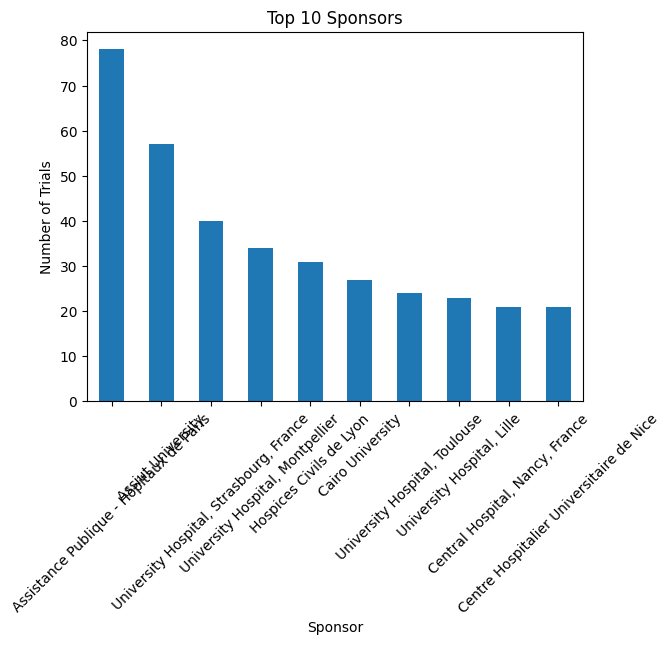

In [14]:
#Sponsor vs Trial Count (Top 10)
df['Sponsor/Collaborators'].value_counts().head(10).plot(kind='bar', title='Top 10 Sponsors')
plt.xlabel('Sponsor')
plt.ylabel('Number of Trials')
plt.xticks(rotation=45)
plt.show()

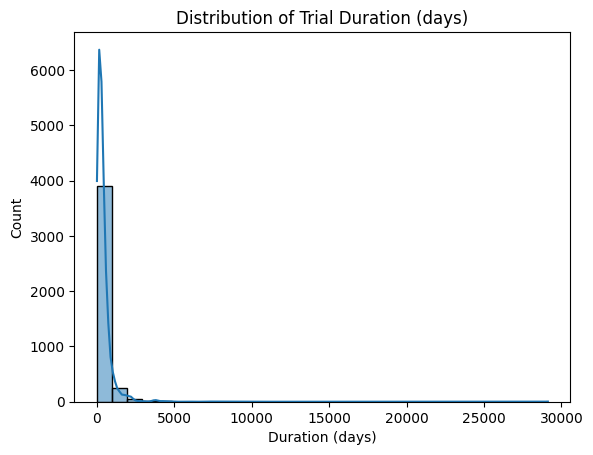

In [15]:
#Duration of Trials
df['Duration (days)'] = (df['Completion Date'] - df['Start Date']).dt.days
sns.histplot(df['Duration (days)'].dropna(), kde=True, bins=30)
plt.title('Distribution of Trial Duration (days)')
plt.xlabel('Duration (days)')
plt.show()

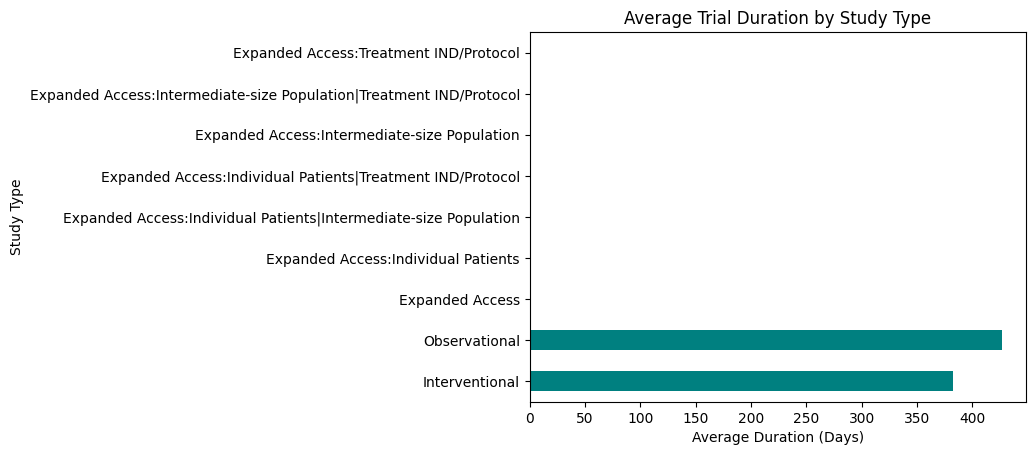

In [16]:
#Average Duration by Study Type
avg_duration = df.groupby('Study Type')['Duration (days)'].mean().sort_values()
avg_duration.plot(kind='barh', color='teal')
plt.xlabel("Average Duration (Days)")
plt.title("Average Trial Duration by Study Type")
plt.show()

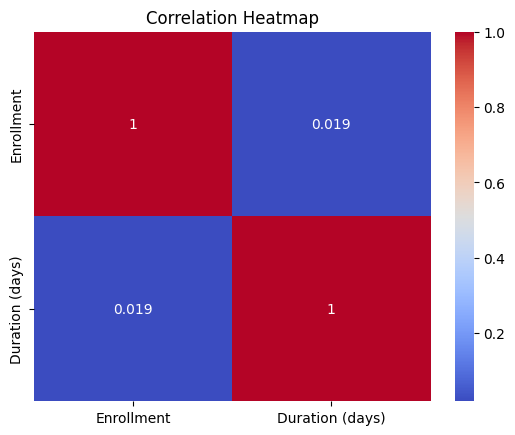

In [17]:
#Correlation Heatmap (Numerical Features)
numerical = df[['Enrollment', 'Duration (days)']]
sns.heatmap(numerical.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()